In [ ]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
#load data
df = pd.read_csv('Dry_Bean_Dataset.csv')
print(df.info())
print(df.head())
print(set(df['Class']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

We observe that there are no missing values in the data.

In [5]:
#encoding the class
dict_characters = {0:'SEKER', 1:'BARBUNYA', 2:'BOMBAY', 3:'CALI', 4:'DERMASON', 5:'HOROZ', 6:'SIRA'}
dict_index = {'SEKER':0, 'BARBUNYA':1, 'BOMBAY':2, 'CALI':3, 'DERMASON':4, 'HOROZ':5, 'SIRA':6}
df['Class'] = df['Class'].map(dict_index)
print(df.shape)
print(df.info())

(13611, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  int64  
dtype

In [6]:
X = df.drop(columns = ['Class'])
y = df['Class']
print(X.shape)
print(y.shape)

(13611, 16)
(13611,)


In [7]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(9119, 16) (9119,)
(4492, 16) (4492,)


We use 1/3rd of our data for testing purposes.

In [8]:
counts = np.bincount(y_train)
counts = counts[:]
print(counts)

[1363  872  344 1102 2391 1290 1757]


Text(0, 0.5, 'Counts')

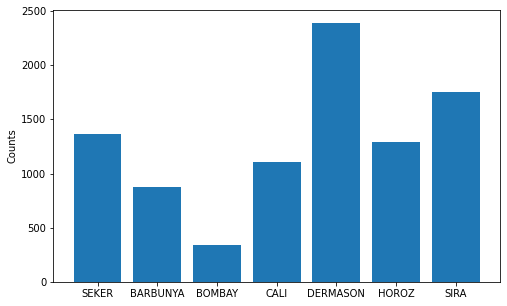

In [9]:
#plotting our training set distribution
fig, ax = plt.subplots(figsize = (8, 5))
plt.bar(list(range(7)), counts)
ax.set_xticklabels(('', 'SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SIRA'))
ax.set_ylabel('Counts')

We observe that the data is unevenly distributed. The Bombay dry beans are fewer in number, and the Dermason dry beans are maximum in number. 

In [10]:
#normalizing the data
means = {}
stds = {}
for parameter in X_train:
    mean = np.mean(X_train[parameter])
    std = np.std(X_train[parameter])
    X_train[parameter] = (X_train[parameter] - mean)/std
    X_test[parameter] = (X_test[parameter] - mean)/std
    means[parameter] = mean
    stds[parameter] = std
        
print(means)
print(stds)

{'Area': 53011.00910187521, 'Perimeter': 854.8606409694013, 'MajorAxisLength': 320.0849523280733, 'MinorAxisLength': 202.1347536439194, 'AspectRation': 1.5837512414502661, 'Eccentricity': 0.7510599437655419, 'ConvexArea': 53728.88825529115, 'EquivDiameter': 252.95598560307158, 'Extent': 0.7495623508398936, 'Solidity': 0.9871555151844491, 'roundness': 0.8733894064806416, 'Compactness': 0.7997492622058354, 'ShapeFactor1': 0.006567535476587332, 'ShapeFactor2': 0.0017164034168220212, 'ShapeFactor3': 0.6434131113276662, 'ShapeFactor4': 0.9950736077779372}
{'Area': 29370.001485537523, 'Perimeter': 214.50217936316605, 'MajorAxisLength': 85.95265815070117, 'MinorAxisLength': 44.8933169243251, 'AspectRation': 0.24683247128319905, 'Eccentricity': 0.09189279263378106, 'ConvexArea': 29817.930047773847, 'EquivDiameter': 59.23666467880758, 'Extent': 0.048999469931583516, 'Solidity': 0.004670298971431595, 'roundness': 0.059314162954113916, 'Compactness': 0.06175944396620055, 'ShapeFactor1': 0.0011277

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We normalize the data by subtracting the mean and dividing by the standard deviation. We use the values of the mean and the standard deviation that we obtained from the training data to accordingly scale our test data.

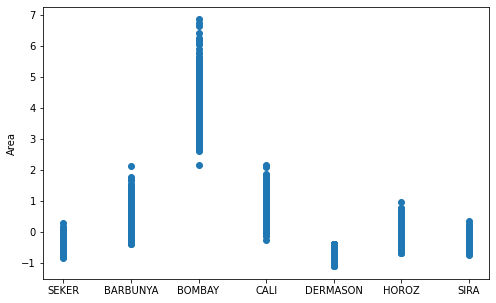

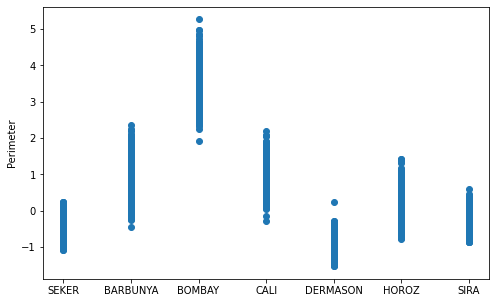

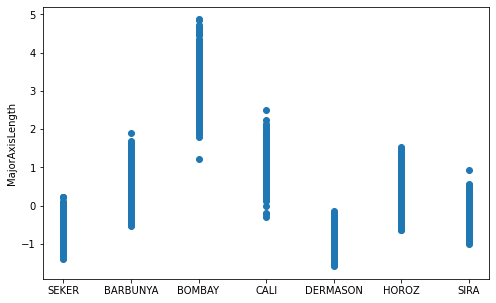

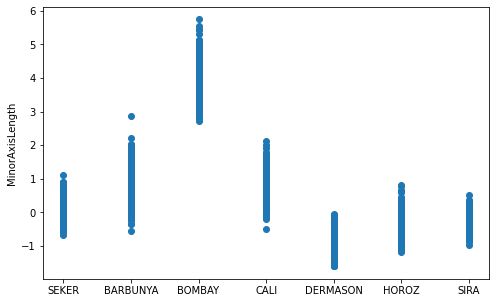

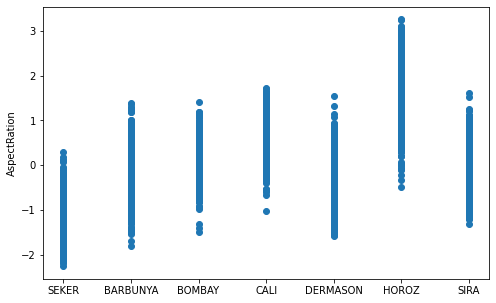

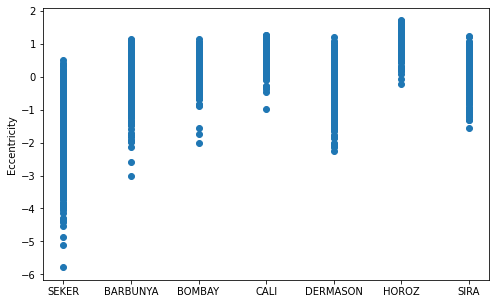

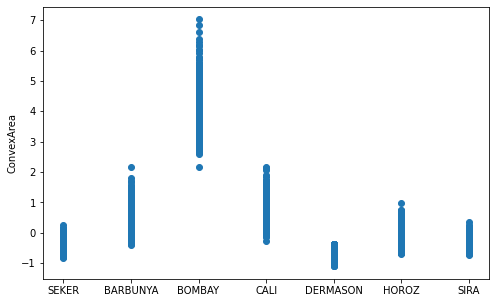

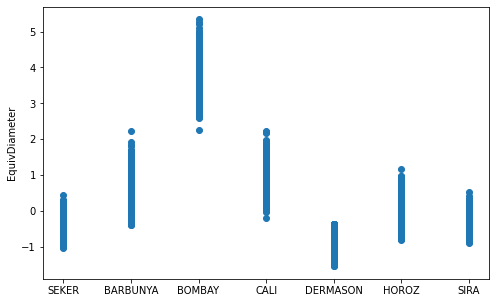

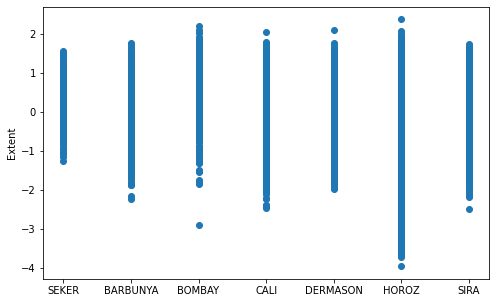

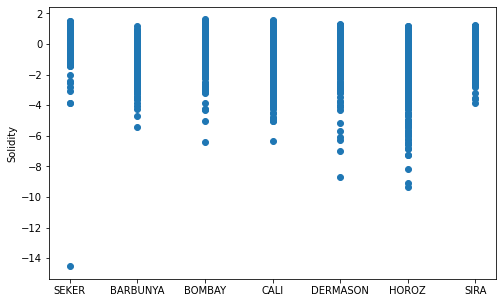

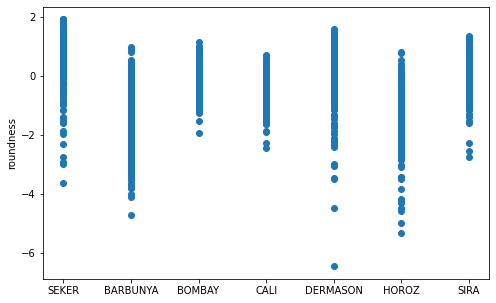

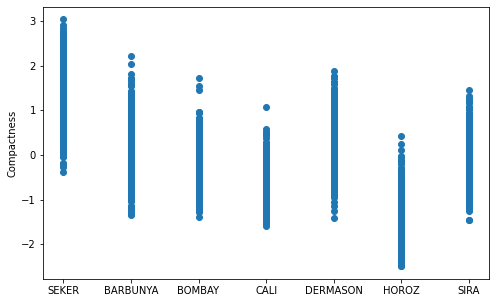

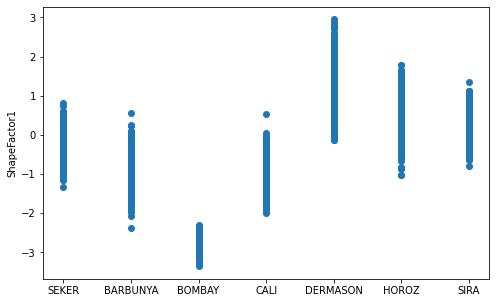

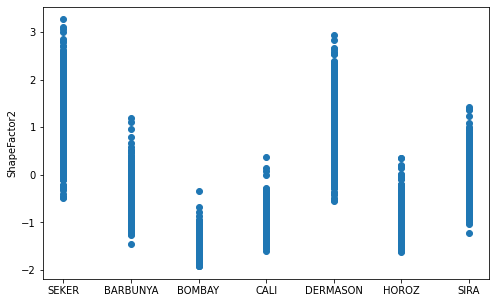

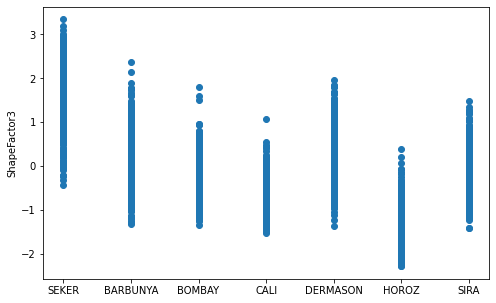

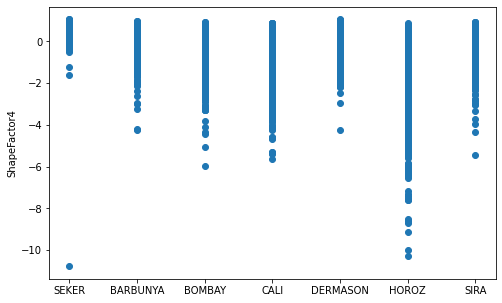

In [11]:
#plotting our parameter values against the class
for parameter in X_train:
    fig, ax = plt.subplots(figsize = (8, 5))
    plt.scatter(y_train, X_train[parameter], )
    ax.set_xticklabels(('', 'SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SIRA'))
    ax.set_ylabel(parameter)

In [12]:
#functions for evaluation metrics
from sklearn import metrics

def accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    return acc  
    

The metric that we choose for evaluation is accuracy. This is because we want to test the overall performance of the model.

# Using Machine Learning

Text(0, 0.5, 'Accuracy')

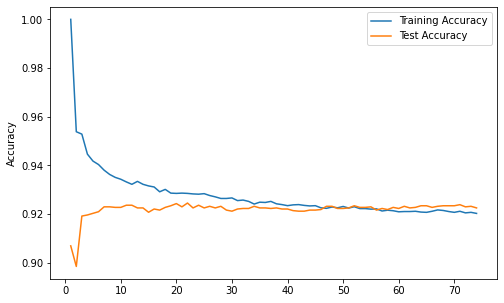

In [13]:
#using a K-Nearest Neighbours Classifier
from sklearn.neighbors import KNeighborsClassifier
n = range(1, 75)
acc_train = []
acc_test = []
for val in n:
    neigh = KNeighborsClassifier(n_neighbors = val)
    neigh.fit(X_train, y_train)
    acc_train.append(accuracy(neigh, X_train, y_train))
    acc_test.append(accuracy(neigh, X_test, y_test))

fig, ax = plt.subplots(figsize = (8, 5))
plt.plot(n, acc_train, label = 'Training Accuracy')
plt.plot(n, acc_test, label = 'Test Accuracy')
plt.legend()
ax.set_ylabel('Accuracy')

We plot the curves for traning data accuracy and test data accuracy. We observe that while the training data achieves a very high accuracy when n = 1, the test data does not reach a similarly high accuracy value. A high variance is observed. It would be more suitable to pick a value of n around 10, to achieve a good balance between bias and variance.

In [14]:
neigh = KNeighborsClassifier(n_neighbors = 10)
neigh.fit(X_train, y_train)
print('Training accuracy:', accuracy(neigh, X_train, y_train))
print('Test accuracy:', accuracy(neigh, X_test, y_test))

Training accuracy: 0.9343129729136966
Test accuracy: 0.9227515583259127


In [16]:
#using a Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
    
print('Training accuracy:', accuracy(clf, X_train, y_train))
print('Test accuracy:', accuracy(clf, X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.8931433659839715


In [18]:
#using naive bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

print('Training accuracy:', accuracy(clf, X_train, y_train))
print('Test accuracy:', accuracy(clf, X_test, y_test))

Training accuracy: 0.8961508937383486
Test accuracy: 0.8982635796972396


Text(0, 0.5, 'Accuracy')

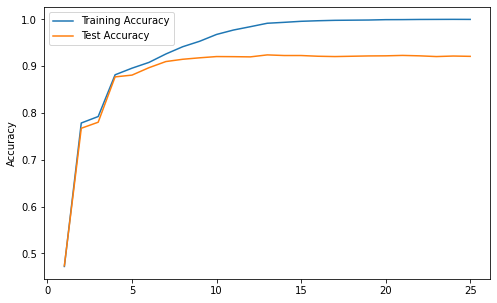

In [19]:
#using a random forest
from sklearn.ensemble import RandomForestClassifier

n = range(1, 26)
acc_train = []
acc_test = []
for val in n:
    clf = RandomForestClassifier(max_depth = val)
    clf.fit(X_train, y_train)
    acc_train.append(accuracy(clf, X_train, y_train))
    acc_test.append(accuracy(clf, X_test, y_test))

fig, ax = plt.subplots(figsize = (8, 5))
plt.plot(n, acc_train, label = 'Training Accuracy')
plt.plot(n, acc_test, label = 'Test Accuracy')
plt.legend()
ax.set_ylabel('Accuracy')

We observe that the model accuracy plateaus at a test accuracy of around 0.9, aroud a depth of 10. At higher values, the model seems to be overfitting (a high variance is observed).

In [20]:
clf = RandomForestClassifier(max_depth = 10)
clf.fit(X_train, y_train)
print('Training accuracy:', accuracy(clf, X_train, y_train))
print('Test accuracy:', accuracy(clf, X_test, y_test))

Training accuracy: 0.9671016558833205
Test accuracy: 0.9209706144256455


#Using Deep Learning

In [22]:
import tensorflow as tf

In [23]:
temp = []
for parameter in X_train:
        val = X_train[parameter].to_numpy()
        temp.append(val)

X_train = np.array(temp).T

In [24]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(7, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train.to_numpy(), epochs = 100)


train_loss = model.evaluate(X_train, y_train.to_numpy())
test_loss = model.evaluate(X_test, y_test.to_numpy())

print('Training Accuracy', train_loss[1])
print('Test Accuracy', test_loss[1])

Epoch 1/100
285/285 [==============================] - 4s 2ms/step - loss: 0.9434 - accuracy: 0.6722
Epoch 2/100
285/285 [==============================] - 0s 2ms/step - loss: 0.2674 - accuracy: 0.9169
Epoch 3/100
285/285 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 0.9233
Epoch 4/100
285/285 [==============================] - 0s 2ms/step - loss: 0.2044 - accuracy: 0.9287
Epoch 5/100
285/285 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9247
Epoch 6/100
285/285 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9280
Epoch 7/100
285/285 [==============================] - 0s 2ms/step - loss: 0.2011 - accuracy: 0.9239
Epoch 8/100
285/285 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9200
Epoch 9/100
285/285 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9291
Epoch 10/100
285/285 [==============================] - 0s 2ms/step - loss: 0.1875 - accura

Using a shallow neural network, we obtain a training set accuracy of 94% and a test accuracy of 93%. This is an improvement from our machine learning models, which gave us a test accuracy of 92%.